# Processamento de dados do arquivo googleplaystore.csv

# Verificando o dataset

In [287]:
import pandas as pd

arquivo = "googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo, sep = ",")

# print(df)

# Visualizacao dos dados para ver se tem inconsistencias

print(df['Category'].unique(),'\n')

print(df['Reviews'].unique(),'\n')

print(df['Size'].unique(),'\n')

print(df['Installs'].unique(), '\n')

print(df['Type'].unique(),'\n')

print(df['Content Rating'].unique(),'\n')

print(df['Genres'].unique(),'\n')

print(df['Last Updated'].unique(),'\n')

print(df['Current Ver'].unique(),'\n')

print(df['Android Ver'].unique(),'\n')

print(df.sort_values(by = 'Category'))

# Aplicativo com coluna deslocada

app = df.sort_values(by = 'Category')

print(app.head(1))

# Aplicativos duplicados

verdadeiro = df[df.duplicated(subset = 'App')]

print(verdadeiro)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9'] 

['159' '967' '87510' ... '603' '1195' '398307'] 

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.

## Retirando linhas duplicadas com o Pandas e tratamento de dados

In [6]:
import pandas as pd
import numpy as np
import csv

arquivo = "googleplaystore.csv"
arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo, sep = ",")

# Removendo Aplicativos duplicados baseado no maior número de reviews

df = df.sort_values(by = 'Reviews', ascending = False).drop_duplicates(subset = 'App')

df = df.drop(df[(df.App == 'Life Made WI-Fi Touchscreen Photo Frame')].index)

# Tratando valores NaN

df['Rating'] = df['Rating'].replace(to_replace = np.nan, value = 'NA')

df['Type'] = df['Type'].replace(to_replace = np.nan, value = 'NA')

df['Content Rating'] = df['Content Rating'].replace(to_replace = np.nan, value = 'Unrated')

df['Android Ver'] = df['Android Ver'].replace(to_replace = np.nan, value = 'NA')

df.to_csv(arquivo_novo, index = False, quoting=csv.QUOTE_MINIMAL)


## Criando gráfico de barras dos 5 apps com os maiores números de instalação

Text(0, 0.5, 'Instalacoes')

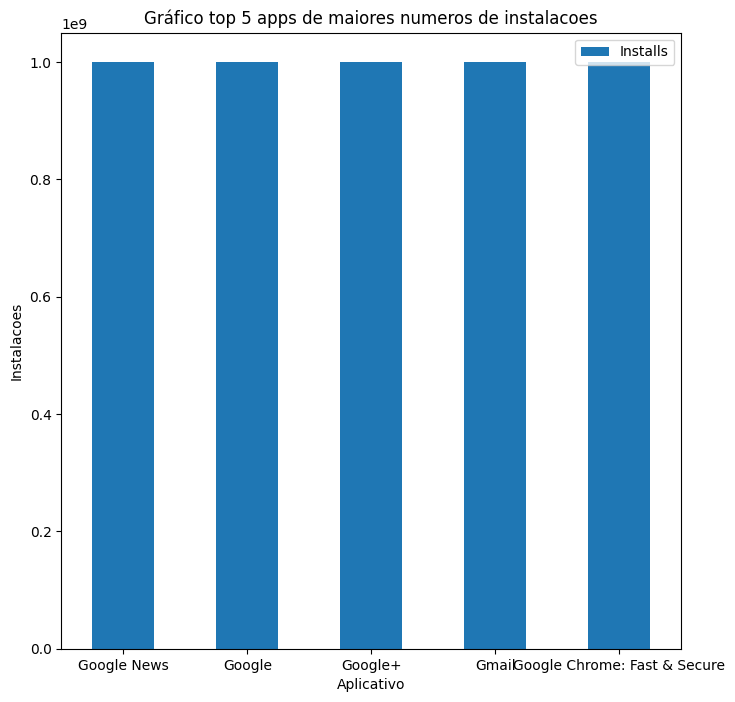

In [293]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Funcoes para retirar o "+"" e a "," para que consiga transformar em numeros e depois fazer uma ordenacao a partir deles

df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '')

df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Ordenacao decrescente do dataframe

df = df.sort_values(by = 'Installs', ascending = False)

# Pega os 5 maiores valores, pois ocorreu a ordenacao

df = df.head(5)

# Grafico de barras pelo pandas

grafico = df.plot.bar(x='App', y='Installs', rot=0, figsize = (8,8))

grafico.set_title('Gráfico top 5 apps de maiores numeros de instalacoes')
grafico.set_xlabel('Aplicativo')
grafico.set_ylabel('Instalacoes')


## Gráfico pizza (pie chart) de acordo com as categorias dos aplicativos

Text(0.5, 1.0, 'Gráfico por categorias dos aplicativos e suas respectivas ocorrencias')

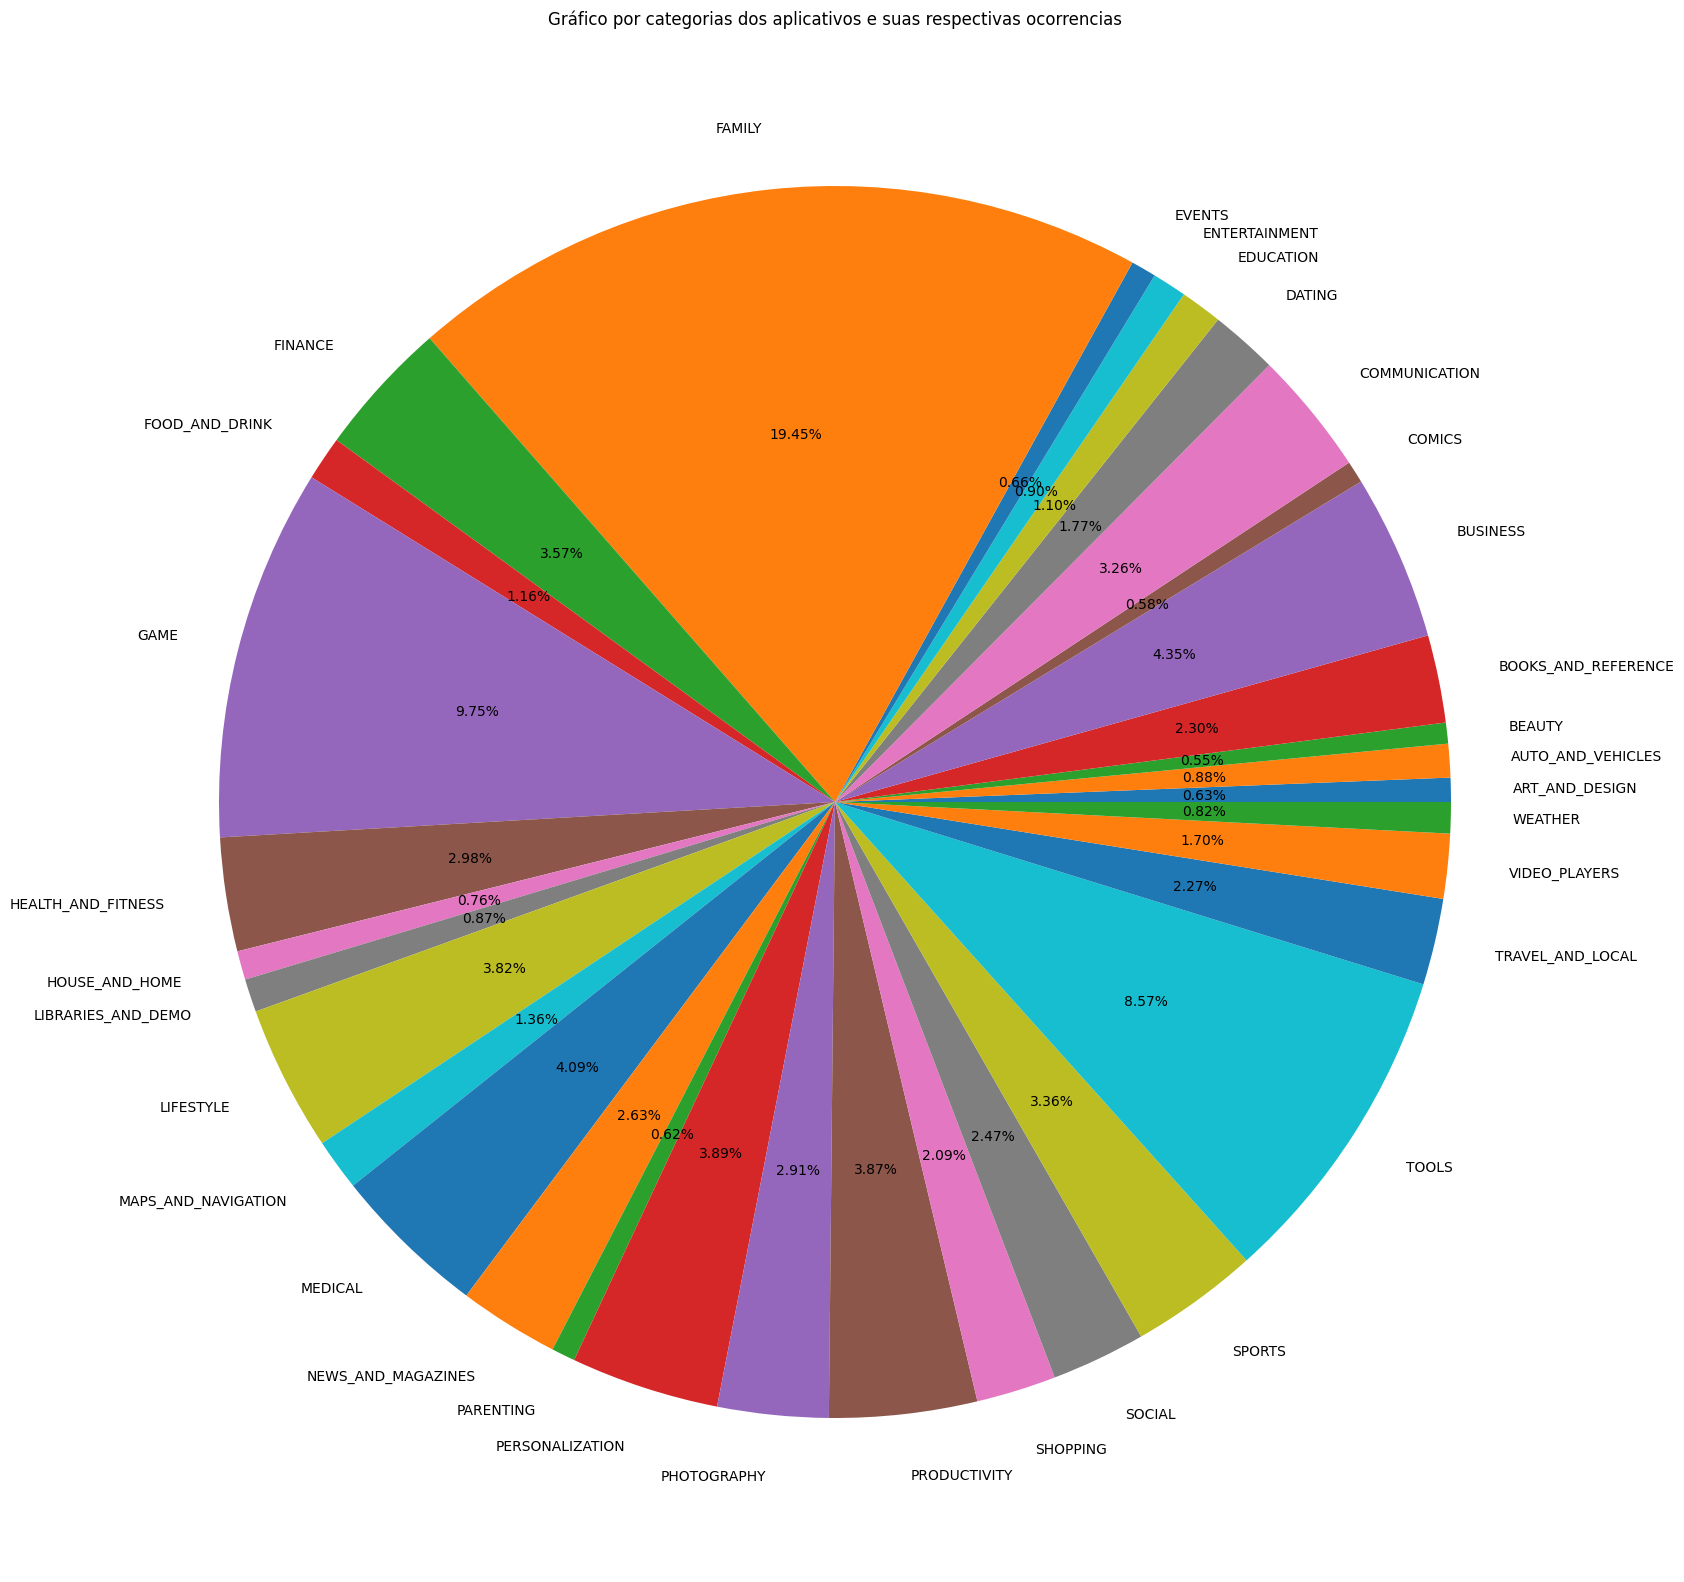

In [296]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Agrupando pelas categorias

df = df.groupby(['Category']).size()

# Grafico do tipo "pie chart" colocando duas casas apos a virgula

grafico = df.plot.pie(autopct="%.2f%%",figsize=(20,20))

grafico.set_title('Gráfico por categorias dos aplicativos e suas respectivas ocorrencias')

## Aplicativo mais caro da Google Play Store

In [298]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Retirando o simbolo do cifrao para que se consiga fazer a ordenacao

df['Price'] = df['Price'].str.replace('$', '')

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Ordenacao decrescente pelo preco

df = df.sort_values(by = 'Price', ascending = False)

df['Price'] = '$' + df['Price'].astype(str)

df.head(1)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4950,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,$400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


# Quantidade de aplicativos com Mature 17+

In [250]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# print que consiste em imprimir a quantidade de aplicativos Mature 17+ para isso é criado um dataframe que vai ter so essas linhas que contem Mature 17+ e com o len é contabilizado as linhas desse dataframe

print('Número de aplicativos com Mature 17+:', len(df[df['Content Rating'] == 'Mature 17+']))

Número de aplicativos com Mature 17+: 393


# Top 10 aplicativos por número de reviews

In [251]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Transforma em numeros os reviews para que se consiga fazer a ordenacao

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Ordenacao decrescente pela coluna Reviews

df = df.sort_values(by = 'Reviews', ascending = False)

# Apresenta os 10 valores ja ordenado, ou seja, os 10 apps com a maior quantidade de reviews

df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
878,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
1357,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
1486,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2100,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
2971,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
3106,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
4928,Subway Surfers,GAME,4.5,27725352,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
5190,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
5326,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
5572,Clash Royale,GAME,4.6,23136735,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up


# Arquivo mais pesado da Google Play Store (Lista)

In [252]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# É somente retirado o M de Mega(bytes), porque nao ha valores G de Giga(bytes), ou maiores

df['Size'] = df['Size'].str.replace('M', '')

df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Ordenacao decrescente pela coluna Size

df = df.sort_values(by = 'Size', ascending = False)

# É colocado novamente o M para visualizacao correta do Mega, vale ressaltar que esse valor é colocado em todas da coluna

df['Size'] = df['Size'].astype(str) + 'M'

# Apresenta o primeiro valor pos ordenacao

df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5217,Miami crime simulator,GAME,4.0,254518,100.0M,"10,000,000+",Free,0,Mature 17+,Action,"July 9, 2018",2.0,4.0 and up


# Arquivo mais leve da Google Play Store (Valor)

In [27]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Nesse caso é retirado o k, por nao haver valores com bytes se fosse retirado o M o valor iria se misturar com os valores que contem o k, assim so foi feito para os valores que contem k

df['Size'] = df['Size'].str.replace('k', '')

df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Ordenacao crescente pela coluna size

df = df.sort_values(by = 'Size', ascending = True)

# Volta o valor k, também vale lembrar que esse valor é colocado em todas da coluna

df['Size'] = df['Size'].astype(str) + 'k'

# Apresenta o arquivo mais leve, porem somente seu valor com a funcao iloc

print('O arquivo', df.iloc[0,0],'tem um tamanho do arquivo', df.iloc[0, 4], 'que é o mais leve do dataset.')

O arquivo Essential Resources tem um tamanho do arquivo 8.5k que é o mais leve do dataset.


# Top 10 jogos mais caros

In [ ]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Retira o simbolo do cifrao

df['Price'] = df['Price'].str.replace('$', '')

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Pega somente as linhas que contem o sports na coluna category

df_game = df[df['Category'] == 'GAME']

# Ordem decrescente pela coluna Price

df = df_game.sort_values(by = 'Price', ascending = False)

# Imprime somente as 10 primeira linhas

df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3255,The World Ends With You,GAME,4.6,4108,13M,"10,000+",Paid,17.99,Everyone 10+,Arcade,"December 14, 2015",1.0.4,4.0 and up
5252,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
6880,Blackjack Verite Drills,GAME,4.6,17,4.7M,100+,Paid,14.00,Teen,Casino,"July 9, 2017",1.1.10,3.0 and up
3632,Star Wars ™: DIRTY,GAME,4.5,38207,15M,"100,000+",Paid,9.99,Teen,Role Playing,"October 19, 2015",1.0.6,4.1 and up
7008,Backgammon NJ for Android,GAME,4.4,1644,15M,"10,000+",Paid,7.99,Everyone,Board,"April 5, 2017",4.1,2.3.3 and up
7460,The Legacy (Full),GAME,4.6,144,6.3M,"1,000+",Paid,6.99,Everyone,Adventure,"May 15, 2018",1.0.9,4.0 and up
2415,New York Mysteries (Full),GAME,4.5,514,5.9M,"5,000+",Paid,6.99,Teen,Adventure,"June 4, 2018",1.0.36,4.0 and up
3954,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,"1,000,000+",Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up
7799,Call of Duty:Black Ops Zombies,GAME,4.2,13004,46M,"100,000+",Paid,6.99,Teen,Action,"December 20, 2016",1.0.11,2.3.3 and up
8490,RollerCoaster Tycoon® Classic,GAME,4.6,10795,69M,"100,000+",Paid,5.99,Everyone,Simulation,"December 21, 2017",1.2.1.1712080,4.0.3 and up


# Quantidade de aplicativos por preço

   Intervalo (USD)  Quantidade
0            0 - 5        9500
1           5 - 10          85
2          10 - 15          21
3          15 - 20          14
4          20 - 30          10
5          30 - 40           5
6          40 - 50           1
7         50 - 100           3
8        100 - 200           3
9        200 - 300           1
10       300 - 400          16
11       400 - 500           0


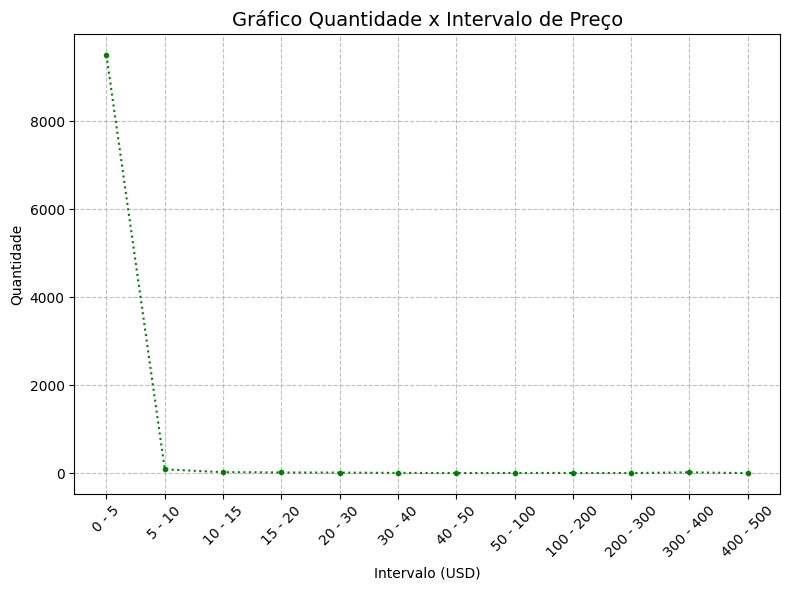

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Retira o simbolo do cifrao

df['Price'] = df['Price'].str.replace('$', '')

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Ordenacao decrescente dos valores

df = df.sort_values(by = 'Price', ascending = False)

# Criacao de intervalos para melhor visualizacao da tabela

intervalo = [0, 5, 10, 15, 20, 30, 40, 50, 100, 200, 300, 400, 500]

intervalo_visual = ['0 - 5', '5 - 10','10 - 15', '15 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 100', '100 - 200', '200 - 300', '300 - 400', '400 - 500']

# Criacao de um novo dataframe

df_intervalo = df

# Utilizacao da funcao cut para colocar em intervalos que foi criado anteriormente

df_intervalo['Intervalo'] = pd.cut(df['Price'], bins = intervalo, labels = intervalo_visual, include_lowest = True)

# Quantidade de elementos a partir dos intervalos

df_intervalo = df_intervalo['Intervalo'].value_counts().sort_index().reset_index()

# Criacao das colunas para a visualizacao da tabela

df_intervalo.columns = ['Intervalo (USD)', 'Quantidade']

print(df_intervalo)

# Criacao do grafico

plt.figure(figsize = (8, 6))

plt.plot(df_intervalo['Intervalo (USD)'], df_intervalo['Quantidade'], marker = '.', linestyle = ':', color = 'green')

plt.xlabel('Intervalo (USD)', fontsize = 10)
plt.ylabel('Quantidade', fontsize = 10)
plt.title('Gráfico Quantidade x Intervalo de Preço', fontsize = 14)

plt.xticks(rotation = 45)
plt.grid(linestyle = '--', alpha = 0.8)

plt.tight_layout()
plt.show()

# Quantidade por Content Rating

    Content Rating  Quantidade
0  Adults only 18+           3
1         Everyone        7903
2     Everyone 10+         322
3       Mature 17+         393
4             Teen        1036
5          Unrated           2


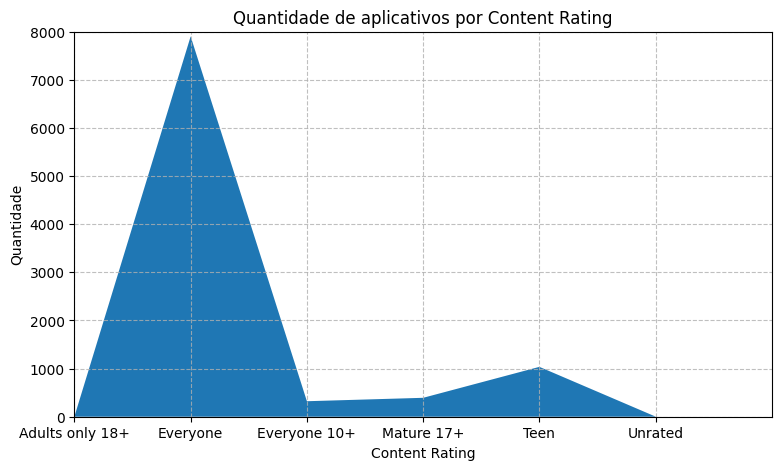

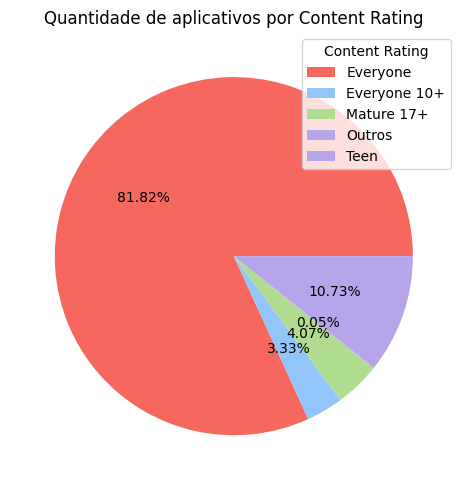

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Contagem das linhas repetidas pela coluna Content Rating

df = df['Content Rating'].value_counts().sort_index().reset_index()

# Criacao das colunas

df.columns = ['Content Rating', 'Quantidade']

print(df)

# Criacao das variaveis para a utilizacao no grafico

content_rating = df['Content Rating']

quantidade = df['Quantidade']

# Criacao do grafico

fig, ax = plt.subplots(figsize = (9, 5))

# Grafico do tipo 'Stack'

ax.stackplot(content_rating, quantidade)

# Delimitacao dos limites dos eixos graficos

ax.set(xlim=(0, len(content_rating)),
       ylim=(0, 8000))

# Criacao do titulo e a identificacao dos eixos

ax.set_title('Quantidade de aplicativos por Content Rating')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Quantidade')

# Plota o grafico
plt.grid(linestyle = '--', alpha = 0.8)
plt.show()

# Modificando dados para melhor visualizacao, agrupar os dados pequenos para que não haja a sobreposicao deles no grafico de pizza final é utilizado a funcaoo where na coluna Quantidade para verificar valores menores que 10 e é criado uma nova linha "Outros"

df['Content Rating'] = df['Content Rating'].where(df['Quantidade']>= 10, 'Outros')
quantidade_novo = df.groupby('Content Rating', as_index = False)['Quantidade'].sum().sort_values(by = 'Content Rating', ascending = True)

content_rating = df['Content Rating']

# Criacao de um grafico do tipo Pie para a visualizacao das porcentagens dos aplicativos e suas respectivas classificacoes

# Cores para o grafico pizza

cores = ['#f6685e', '#92C5F9', '#AFDC8F', '#B6A6E9', '#B6A6E9', '#70d9e7']

# Criacao do grafico

fig, ax = plt.subplots(figsize = (9, 5))

# Grafico pizza, o autopct para colocar a quantidade de casas decimais e nos colors é declarado as cores da lista anterior

ax.pie(quantidade_novo['Quantidade'], autopct = '%1.2f%%', colors = cores)

# Titulo do grafico

ax.set_title('Quantidade de aplicativos por Content Rating')

# Legenda do grafico com seu respectivo titulo, localizado no lado direito da parte de cima

ax.legend(quantidade_novo['Content Rating'], title = 'Content Rating', loc = 'upper right')

# Construcao do grafico

plt.tight_layout()
plt.show()
